In [32]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
data = np.load("train.npy")

In [ ]:
X = []
Y = []
i = 0
for elem in data:
    if i % 1000 == 0:
        print(i)
    X.append(tf.resize(elem[0], output_shape=(40,40)))
    Y.append(elem[1])
    i += 1

In [12]:
np.save('X', X)

In [13]:
np.save('Y', Y)

In [29]:
X = np.array(X)
Y = np.array(Y)

In [1]:
import numpy as np
import pandas as pd

X = np.load("X.npy")
Y = np.load("Y.npy")

X.resize((166708,40,40,1))

labels = np.unique(Y)
labels = labels.tolist()

for i in range(len(Y)):
    Y[i] = labels.index(Y[i])

X = X.astype(np.float16)
Y = Y.astype(np.int16)

## Data augmentation


In [31]:
X = np.load("X.npy")
Y = np.load("Y.npy")

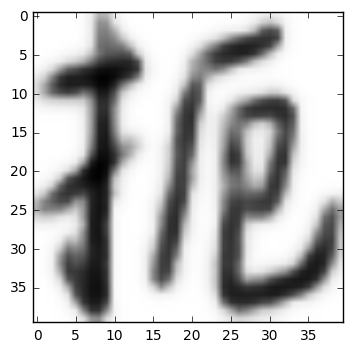

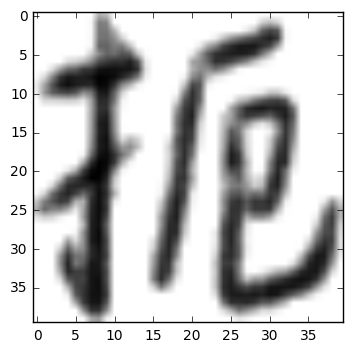

In [50]:
from skimage.filters import threshold_adaptive
from skimage.morphology import skeletonize
from skimage.restoration import denoise_bilateral
plt.imshow(denoise_bilateral(X[0], multichannel=False), 'gray')
plt.figure()
plt.imshow(X[0], 'gray')

In [61]:
from tqdm import tqdm
from skimage.transform import rotate
X_denoise_rotate = []

for elem in tqdm(X):
    X_denoise_rotate.append(rotate(denoise_bilateral(elem,multichannel=False),
                     np.random.randint(low = -7, high=7) , resize=False))

100%|██████████| 166708/166708 [05:47<00:00, 479.93it/s] | 34/166708 [00:00<08:18, 334.43it/s]


In [62]:
np.save('X_denoise_rotate', X_denoise_rotate)

In [5]:
X_aug = []
Y_aug = []

for epoch in range(2):
    
    for i in range(len(X)):
        if i % 10000 == 0:
            print(epoch, i)
        temp = X[i]
        temp = noise_filter(temp, disk(np.random.random()))

        X_aug.append(rotate(X[i], np.random.randint(low = -30, high=30) , resize=False))
        X_aug.append(rotate(temp, np.random.randint(low = -30, high=30) , resize=False))
        Y_aug.append(Y[i])
        Y_aug.append(Y[i])

0 0


/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


0 10000
0 20000
0 30000
0 40000
0 50000
0 60000
0 70000
0 80000
0 90000
0 100000
0 110000
0 120000
0 130000
0 140000
0 150000
0 160000
1 0
1 10000
1 20000
1 30000
1 40000
1 50000
1 60000
1 70000
1 80000
1 90000
1 100000
1 110000
1 120000
1 130000
1 140000
1 150000
1 160000


In [12]:
size = int(len(X_aug)*7/10)
np.save('X_aug', X_aug[:size])
np.save('Y_aug', Y_aug)

In [2]:
X_denoise_rotate = np.load("X_denoise_rotate.npy")

In [3]:
X_denoise_rotate.resize((len(X_denoise_rotate),40,40,1))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_denoise_rotate, Y, test_size=0.1, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_aug, Y_aug[:int(len(Y_aug) * 7 / 10)], test_size=0.3, random_state=42)

In [4]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K

from keras.callbacks import TensorBoard

batch_size = 512
nb_classes = 500
nb_epoch = 10

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

input_shape = (40,40,1)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()



model.add(Convolution2D(64, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(BatchNormalization())

model.add(Convolution2D(128, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))


model.add(Flatten())

model.add(BatchNormalization())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(BatchNormalization())


model.add(Dense(500))
model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

tensorbord = TensorBoard(log_dir='/home/axcel/logs', histogram_freq=0,
                                         write_graph=True, write_images=True)

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, validation_data=(X_test, Y_test), callbacks=[tensorbord])
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 38, 38, 64)    640         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_6 (Activation)        (None, 38, 38, 64)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 19, 19, 64)    0           activation_6[0][0]               
____________________________________________________________________________________________________
batchnormalization_5 (BatchNorma (None, 19, 19, 64)    256         maxpooling2d_3[0][0]             
___________________________________________________________________________________________

KeyboardInterrupt: 

In [18]:
X_aug = np.array(X_aug[:size], copy=False)
X_aug.resize((len(X_aug),40,40,1))

labels = np.unique(Y_aug)
labels = labels.tolist()

for i in range(len(Y_aug)):
    Y_aug[i] = labels.index(Y_aug[i])

X_aug = X_aug.astype(np.float16)
Y_aug = np.array(Y_aug).astype(np.int16)

In [5]:
from keras.models import load_model


model = load_model("./Models Architecture/3 conv with maxpool and batchnorm with 2 dense 20 epoch")

Using TensorFlow backend.


In [9]:
from keras.utils import np_utils
from keras.callbacks import TensorBoard

batch_size = 1024
nb_classes = 500
nb_epoch = 10

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

input_shape = (40,40,1)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

tensorbord = TensorBoard(log_dir='/home/axcel/logs', histogram_freq=0,
                                         write_graph=True, write_images=True)

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=2, validation_data=(X_test, Y_test), callbacks=[tensorbord])
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 150037 samples, validate on 16671 samples
Instructions for updating:
Please switch to tf.summary.merge_all.
Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
Epoch 1/10
36s - loss: 0.0989 - acc: 0.9725 - val_loss: 0.8027 - val_acc: 0.8452
Epoch 2/10
36s - loss: 0.0318 - acc: 0.9905 - val_loss: 0.4845 - val_acc: 0.9040
Epoch 3/10
36s - loss: 0.0082 - acc: 0.9985 - val_loss: 0.2945 - val_acc: 0.9343
Epoch 4/10
36s - loss: 0.0032 - acc: 0.9998 - val_loss: 0.2598 - val_acc: 0.9398
Epoch 5/10
36s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.2422 - val_acc: 0.9445
Epoch 6/10
36s - loss: 0.0021 - acc: 0.9999 - val_loss: 0.2405 - val_acc: 0.9451
Epoch 7/10
36s - loss: 0.0020 - acc: 0.9999 - val_loss: 0.2428 - val_acc: 0.9454
Epoch 8/10
36s - loss: 0.0018 - acc: 0.9999 - val_loss: 0.2391 - val_acc: 0.9452
Epoch 9/10
36s - loss: 0.0018 - acc: 0.9999 - val_loss: 0.2397 - val_acc: 0.9460
Epoch 10/10
36s - loss: 

NameError: name 'score' is not defined

In [10]:
model.save("3 conv with maxpool and batchnorm with 2 dense 20 epoch + 30 denoised and rotated")

In [7]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import numpy as np

In [1]:
from keras.models import load_model


model = load_model("./Models Architecture/mnist_cnn_architecture_first_sub")

Using TensorFlow backend.


In [11]:
test = np.load('test.npy')

In [12]:
import skimage.transform

test_set = []
i = 0
for elem in test:
    if i % 1000 == 0:
        print(i)
    test_set.append(skimage.transform.resize(elem, output_shape=(40,40)))
    i += 1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000


In [13]:
test_set = np.array(test_set)

In [10]:
test_set.shape

(41428, 40, 40)

In [14]:
test_set.resize((41428,40,40,1))

In [33]:
ans = model.predict_classes(test_set, verbose=0)

In [16]:
model1 = load_model("./Models Architecture/3 conv with maxpool and batchnorm with 2 dense 20 epoch")
model2 = load_model("./Models Architecture/3 conv with maxpool and batchnorm with 2 dense 20 epoch + 10 augmented")
model3 = load_model("./Models Architecture/4 conv with maxpool and batchnorm")
model4 = load_model("./Models Architecture/4 conv with maxpool and batchnorm V2")
model5 = load_model("./Models Architecture/4 conv with maxpool and batchnorm V2 200 epoch")
model6 = load_model("./Models Architecture/mnist_cnn_architecture_first_sub")
model7 = load_model("./Models Architecture/3 conv with maxpool and batchnorm with 2 dense 20 epoch + 30 denoised and rotated")

In [17]:
prediction1 = model1.predict_proba(test_set, verbose=2)
prediction2 = model2.predict_proba(test_set, verbose=2)
prediction3 = model3.predict_proba(test_set, verbose=2)
prediction4 = model4.predict_proba(test_set, verbose=2)
prediction5 = model5.predict_proba(test_set, verbose=2)
prediction6 = model6.predict_proba(test_set, verbose=2)
prediction7 = model7.predict_proba(test_set, verbose=2)

In [18]:
summury_predict = (prediction1 + prediction2 + prediction3 +
                   prediction4 + prediction5 + prediction6 + prediction7) / 7

In [19]:
ans = []
for elem in summury_predict:
    ans.append(np.argmax(elem))

In [20]:
for i in range(len(ans)):
    ans[i] = labels[ans[i]]

In [21]:
ans = pd.DataFrame(ans)

In [22]:
temp = [i+1 for i in range(len(test_set))]

temp = pd.DataFrame(temp)

In [23]:
result = pd.concat([temp, ans], axis=1)

In [24]:
result.columns = ['Id', 'Category']

In [25]:
result = result.as_matrix()

In [26]:
import numpy
numpy.savetxt("summary_subv2.csv", result, delimiter=",")